## Sentiment Analysis for Tweets of US Airlines

## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)

*   2.1 [Popularity of Airlines](#cell_popularity)
*   2.2 [Most Popular States of Customers By Airlines](#cell_popularstate)






3. [Sentiment Analysis](#cell_sentiment)


*   3.1 [Machine Learning Based Approach](#cell_ML)
    
*  3.1.1 [Data Preparation](#cell_MLdataprepare)
*  3.1.2 [Apply Machine Learning Models](#cell_MLmodel)
*  3.1.3 [Model Evaluation](#cell_MLevaluate)



*   3.2 [Lexicon Based Approach](#cell_LBA)
*   3.2.1 [Data Preparation](#cell_LBAprepare)
*   3.2.2 [Lexicon Based Analysis](#cell_LBAanalysis)



4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary


Social Analytics help companies to understand their customers better by analysing their textual review contents posted on social media to examine their perception, sentiments and satisfaction about the products or services, and what their concerns are for effective business improvements (IBM, n.d.). Common Social Analytical techniques include Sentiment Analysis, Natural-Language Processing (NLP), Text Analysis, Sentiment Prediction and Topic Modelling (IBM, n.d.). The purpose of this project is to study customer's sentiments and percpetions by performing social analytical techniques on a given dataset, which contains around 14,000 tweets posted on social media about 6 major airlines in America, including American, Delta, Southwest, US Airways, United	and Virgin America, to provide insights for better business performance.

Among the 15 attributes in the dataset, I focus on the 6 following relevant attributes for further analysis:

1.    tweet_id
2.    airline_sentiment
3.    airline
4.    name
5.    text
6.    tweet_location

**Business Problems**

The following questions are of interest:



1.   What is the popularity of airlines based on the number of tweets posted?


2.   What are the most popular states where customers are located for each airline?

3.   Is it possible to predict tweet’s sentiments by using machine learning approach on the provided raw data set?


4.   Among the top 3 airlines with most tweets, which airlines received more positive sentiments than negative sentiments from customers based on the sentiment analysis?


5.   What are the commonly mentioned issues that customers feel negative about the airlines?

**Our Approach**

I identify the popularity of airlines being mentioned based on tweet numbers, and the most popular states where each airlines' customers are located by extracting the first US abbreviations input by each customer.  I then apply social analytical techniques on the textual contents of the tweets, which includes:


1.   Sentiment prediction by using 2 machine learning approaches(Multinomial Naive Baynes and Gradient Boosting) on the content and evaluate their performances on predictions against the airline sentiments of each tweet.
2.   Lexicon based analysis to calculate sentiment orietnation of the sets of sentences in the textual contents of the top 3 popular airlines and compare the proportions of negative and positive sentiments.
3.   Topic modelling to extracting meaningful nouns mentioned in each tweet with negative airline sentiments to extract the common concerns of unhappy customers.


**Key Findings**

Overview: The airline sentiments shows the top 3 most popular airlines, United, American and US Airways, recieved considerably higher proportion of negative sentiments.

Problem 1: The popularity of the 6 airlines is ranked and listed in order below:

1.  United (26.4%)
2.  US Airways (20.1%)
3.  American (18.1%)
4.  Southwest (16.7%)
5.  Delta (15.3%)
6.  Virgin America (3.5%)

Problem 2: The most popular states where customers are located for each airline are listed below:

American and Southwest: Texas, TX

US Airways and Delta: New York, NY

United and Virgin America: California, CA

Problem 3: Comparing the model performances of Multinomial Naive Bayens and Gradient Boosting approaches, Multinomial Naive Baynes outpreforms the other, showing an accuracy rate of 74.8%. Meanwhile, it is worth to note that both models seem have difficulties in predicting neutral sentiments.

Problem 4: Among the 3 most popular airlines, American and United received slightly more positive sentiments than negative sentiments, at 50.6% and 51% positive proportions respectively.

Problem 5: The summary of 6 topics that customers are not happy with are listed below:

1.   Airline gate, luggage and agent problems(15%)
2.   Long phone response time about seat and baggage re-arrangement (**18%**)
3.   Help supports caused by delays (17%)
4.   Airport based services relating to glights, staff, and system (17%)
5.   Airline timing problem interrupt their trip plan (16%)
6.   Customer service regarding to credit, delays and planes (17%)

In general, the popularity of topics are almost equally distributed, but with topic 2 slightly more popular. Virgin America seems to have problems mentioned in topic 1 and 2 more frequently than the others, but outpreform all others in dealing with issues in topic 6. The issues in topic 3 is most common to Delta. For US airways and Southwest, issues in topic 2 and 6 are most common, while for United, issues in topic 3 and 6 are most common.

**Practical Implication**

The phenomenon of significantly high proportions of negative sentiments towards the 3 most popular airlines might imply that their customers tend to post comments on social media when they are dissatisfied with the airline's offerings. In this connection, especially for these 3 airlines, performing constant social analytics is an effective way to improving their customer satisfaction by examining their dissatisfactory reasons. Combining these findings with the almost equal proportions of positive and negative sentiments observed in Lexicon based analysis (Section 3.2.2), their customers tend to have negative sentiments towards the airlines even they do not post negative comments on social media. Accordingly, airlines can compare customer feedbacks obtained by their other channels and the textual contents on social media to better picture their dissatisfacton. They can also increase their channels for collecting customer feedbacks, such as short survey and chatbots, for better customer experience examinations. Airlines can apply machine learning models to predict customer's emotion about their services in advance, and take appropriate actions to retain existing customers and attract new customers.

Based on the figures of popularities and geographical distributions of customers, it appears the pair of American and Southwest, and US Airways and Delta, are direct competitors to each other. Airlines can monitor closely on their direct rivals' actions to stay competitive.

Our key findings from topic modelling show the most common issues that lead to customer's dissatisfaction. Airlines can focus on improving these issues, such as hiring more customer service representatives, reviewing and streamlining their procedures and automating some of the processeses to better support their customers.In addition, the common issues of all airlines are related to airline timing problems that interrupt their trip plan. Airlines may improve the first two issues by improving punctuality of their flights and review their policy on supporting customers to better transitions, like providing discounted temporary accomodations, or offering alternative flights to corp with their plans.
















<a id = "cell_exploration"></a>
### 2. Data Exploration



In [16]:
#Overview of dataset
import pandas as pd

# Read dataset
df = pd.read_csv('Airline_sentiment_tweets.csv')

# Check whether there is missing values in airline
print(df.shape)
print(df.info())

df.head()

(14640, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  ob

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


The above output shows the data set contains 14,640 rows of data with 15 attributes, which are listed above. Among the attributes, 'airline_sentiment_gold', 'negativereason_gold','negativereason_coonfidence' and 'tweet_coord' barely contain any meaningful values. Also, 'airline_sentiment_confidence','retweet_count','tweet_created'(time of the tweet being posted) and 'user_timezone' are irrelevant for our further analysis. For the column of 'negativereason', it only includes general aspects of negative feedbacks. In this connection, these 6 attributes will be dropped.


In [17]:
#Drop irrelevant columns
df=df.drop(columns=['negativereason','airline_sentiment_gold','negativereason_gold',
                    'tweet_coord', 'tweet_created','user_timezone','airline_sentiment_confidence','negativereason_confidence','retweet_count'])
df=df.drop_duplicates() #remove duplicate rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14503 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           14503 non-null  int64 
 1   airline_sentiment  14503 non-null  object
 2   airline            14503 non-null  object
 3   name               14503 non-null  object
 4   text               14503 non-null  object
 5   tweet_location     9812 non-null   object
dtypes: int64(1), object(5)
memory usage: 793.1+ KB



To get an quick overview of customers' sentiments against each airlines, I visualised their sentiments below.

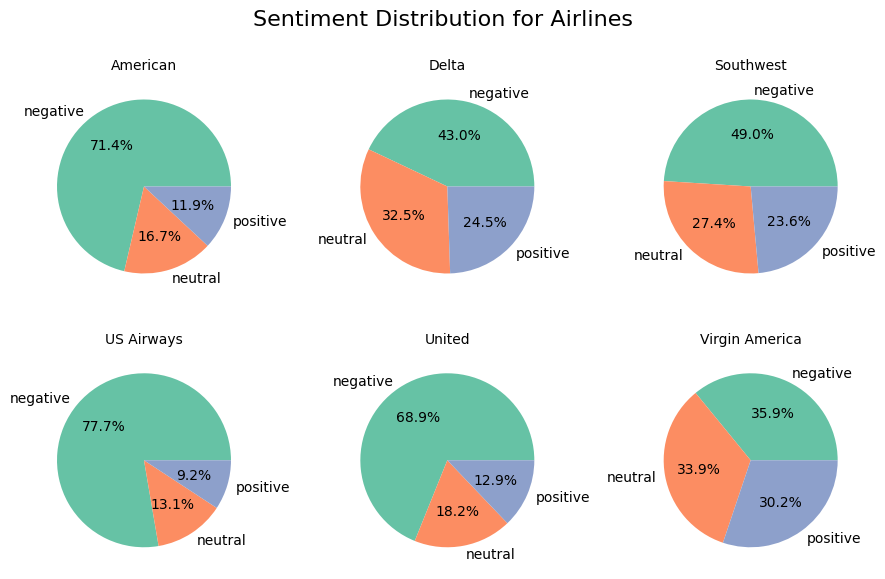

In [18]:
import matplotlib.pyplot as plt
import seaborn

air_sentiment = df.groupby(['airline','airline_sentiment'])['tweet_id'].count().reset_index(name="counts")

# get unique airlines from the dataframe
airlines = air_sentiment['airline'].unique()

# visualise air sentiments by airlines
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
axes = axes.flatten()
colors = seaborn.color_palette('Set2')

# plot pie chart for each airline
for i, airline in enumerate(airlines):
    sentiment_data = air_sentiment[air_sentiment['airline'] == airline]
    sentiment_counts = sentiment_data['counts']
    sentiment_labels = sentiment_data['airline_sentiment']
    ax = axes[i]
    ax.pie(sentiment_counts, labels=sentiment_labels, colors= colors, autopct='%1.1f%%')
    ax.set_title(airline, fontsize=10)

plt.suptitle("Sentiment Distribution for Airlines", fontsize=16)
plt.tight_layout()
plt.show()

Based on the above plots, in general, most customers of American, US Airways and United have negative sentiments. Half of Southwest's customers feel negatively, while most customers of Delta and Virgin America feel positive against the airlines. Further analysis will be performed in the following sections.



     

<a id = "cell_popularity"></a>
**2.1 Problem 1: Popularity of Airlines**

 *Rank the popularity of airlines based on the number of tweets posted for each airline.*

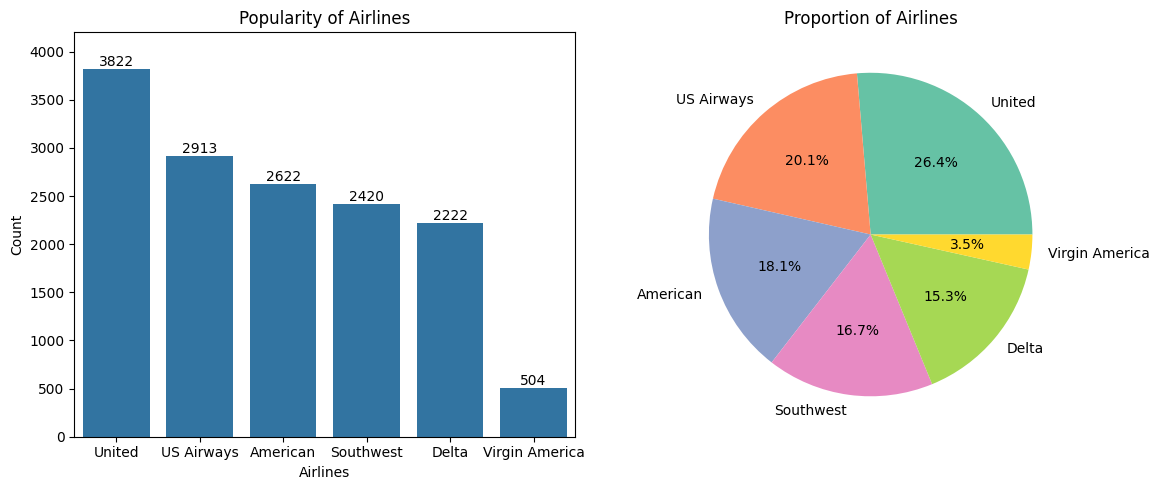

In [50]:


from matplotlib import pyplot as plt
import seaborn as sns

airline = df.groupby(['airline'])['text'].count().reset_index(name='count')
airline = airline.sort_values(by='count', ascending=False)

# Visualise with bar chart and pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=airline['airline'], y=airline['count'], data=df, ax=axes[0])
axes[0].set_title('Popularity of Airlines')
axes[0].set_xlabel('Airlines')
axes[0].set_ylabel('Count')
axes[0].bar_label(axes[0].containers[0])  # Add labels on top of the bars
axes[0].set_ylim(0, 4200)

airline_counts = airline['count']
airline_labels = airline['airline']

axes[1].pie(airline_counts, labels=airline_labels, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
axes[1].set_title('Proportion of Airlines')

plt.tight_layout()
plt.show()


The popularity of the 6 airlines is ranked and shown above in the bar plot.

The ranks are:


1.   United
2.   US Airways
3.   American
4.   Southwest
5.   Delta
6.   Virgin America




---



<a id = "cell_popularstate"></a>
**2.2 Problem 2: Most Popular States of Customers By Airlines**

*Identify the most popular states where customers are located for each airline.*

I extract the US abbreviation codes in the tweet_location column to identify the location of users. Some users are based in multiple locations. However, to make it consistent, each user is considered to belong to their *one* state only, based on their *first* US abbreviation input.

In [ ]:
import re

#state_pattern = r'\b[A-Z]{2}\b'
df['state'] = df['tweet_location'].str.extract(r'(\b[A-Z]{2}\b)')

#each user is counted once only with their first input State
df_name_counts = df.drop_duplicates(subset='name')

df_name_counts = df_name_counts[df_name_counts['state'].isin([
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
])]

name_counts = df_name_counts.groupby(['airline', 'state'])['name'].size().reset_index(name='Count')
popular_state = name_counts.groupby('airline').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)
print('The most popular state of customers by airlines:\n',popular_state[['airline','state']])

The most popular state of customers by airlines:
           airline state
0        American    TX
1           Delta    NY
2       Southwest    TX
3      US Airways    NY
4          United    CA
5  Virgin America    CA


The most popular states where customers are based in of each airline are listed above.


---



<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis


 <a id = "cell_ML"></a>
 **3.1 Problem 3: Tweet Sentiments Prediction by Applying Machine Learning Models (Machine Learning Based Approach)**


*Is it possible to predict tweet’s sentiments using machine
learning approach based on the provided raw data set? If yes, demonstrate the procedure and evaluate the performance with two different machine learning models.*




To predict tweet's sentiments by using machine learning models according to the given raw dataset, the procedures are as below:

1.   Data Preparation
2.   Apply Machine Learning Models
3.   Model Evaluation





 <a id = "cell_MLdataprepare"></a>
**3.1.1 Data Preparation**

For performing sentiment analysis, pre-processing on the textual content of customer's tweets is required and done  by removing meaningless items, like stop-words, symbols and punctuations, to uncover the text's true meaning and sentiment of the text.

In [51]:
import warnings
warnings.filterwarnings("ignore")

df_sentiment = df

# Transform the text to lower case
df_sentiment['text'] = df_sentiment['text'].str.lower()

# Define a program to clean the text, dropping the unwanted items
# Also remove the airline names
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', '')
    ReviewText = ReviewText.str.replace('@', '')
    ReviewText = ReviewText.str.replace('http', '')
    ReviewText = ReviewText.str.replace('virginamerica', '')
    ReviewText = ReviewText.str.replace('united', '')
    ReviewText = ReviewText.str.replace('southwestair', '')
    ReviewText = ReviewText.str.replace('jetblue', '')
    ReviewText = ReviewText.str.replace('usairways', '')
    ReviewText = ReviewText.str.replace('americanair', '')

    return ReviewText

df_sentiment['text'] = preprocess(df_sentiment['text'])

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# tokenizer to remove non-meaningful items/words from the data
# keep alphabats and numbers only, remove symbols
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts = cv.fit_transform(df_sentiment['text'])
print('Bag of Word Matrix size: ', text_counts.shape)
print('Data in the first row:\n', text_counts[1,:])


Bag of Word Matrix size:  (14503, 14751)
Data in the first row:
   (0, 10262)	1
  (0, 13922)	1
  (0, 1959)	1
  (0, 3974)	1
  (0, 5584)	1
  (0, 12723)	1


 <a id = "cell_MLmodel"></a>
**3.1.2 Apply Machine Learning Models**

Then I can use the pre-processed text to predict tweet's sentiment (i.e. 'airline_sentiment' column) by using TWO machine learning models, which are **Mutlinomial Naive Baynes** and **Gradient Boosting**. Multinomial Naive Baynes model is  a popular model used for Natural Language Processing (NLP), while Gradient Boosting is a technique commonly used for general classification. I will compare the model performance by using statistical measures, including accuracy, precision, recall, kappa and confusion matrix.

*Multinomial Naive Baynes*

Performance Metrics of Multinomial Naive Baynes.

MultinomialNB Accuracy: 0.749
MultinomialNB Kappa: 0.473
MultinomialNB Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.94      0.84      2726
     neutral       0.66      0.36      0.46       911
    positive       0.72      0.52      0.61       714

    accuracy                           0.75      4351
   macro avg       0.72      0.61      0.64      4351
weighted avg       0.74      0.75      0.73      4351



Text(0.5, 1.0, 'MultinomialNB Confusion Matrix')

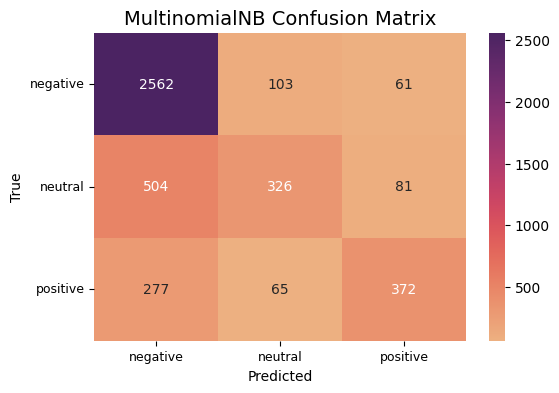

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_sentiment['airline_sentiment'], test_size=0.3, random_state=1)

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

labels = ["negative","neutral","positive"]
confusion_mat_NB = metrics.confusion_matrix(y_test, predicted, labels = labels)

print('Performance Metrics of Multinomial Naive Baynes.\n')
print("MultinomialNB Accuracy:", round(metrics.accuracy_score(y_test, predicted),3))
print("MultinomialNB Kappa:", round(metrics.cohen_kappa_score(y_test, predicted),3))
print("MultinomialNB Classification Report:\n",
      metrics.classification_report(y_test, predicted, labels=['negative','neutral','positive']))

#visualise confusion matrix
fig = plt.figure(figsize=(6, 4))
ax= plt.subplot()
sns.heatmap(confusion_mat_NB, cmap="flare", annot=True, ax = ax, fmt = 'g');
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_ticklabels(labels, fontsize = 9)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 9)
plt.yticks(rotation=0)

plt.title('MultinomialNB Confusion Matrix', fontsize=14)


*Gradient Boosting*

Performance Metrics of Gradient Boosting.

Gradient Boosting Accuracy: 0.711
Gradient Boosting Kappa: 0.351
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.96      0.82      2726
     neutral       0.78      0.10      0.18       911
    positive       0.69      0.55      0.61       714

    accuracy                           0.71      4351
   macro avg       0.73      0.54      0.54      4351
weighted avg       0.72      0.71      0.65      4351



Text(0.5, 1.0, 'Gradient Boosting Confusion Matrix')

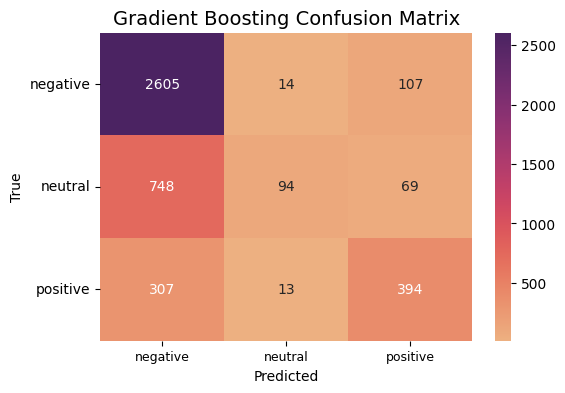

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_sentiment['airline_sentiment'], test_size=0.3, random_state=1)

# Model Generation Using Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
predicted= clf.predict(X_test)
confusion_mat_GB = metrics.confusion_matrix(y_test, predicted, labels = labels)

print('Performance Metrics of Gradient Boosting.\n')
print("Gradient Boosting Accuracy:", round(metrics.accuracy_score(y_test, predicted),3))
print("Gradient Boosting Kappa:", round(metrics.cohen_kappa_score(y_test, predicted),3))
print("Gradient Boosting Classification Report:\n",
      metrics.classification_report(y_test, predicted, labels=['negative','neutral','positive']))

#visualise confusion matrix
fig = plt.figure(figsize=(6, 4))
ax= plt.subplot()
sns.heatmap(confusion_mat_GB, cmap="flare", annot=True, ax = ax, fmt = 'g');
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=10)
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_ticklabels(labels, fontsize = 9)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Gradient Boosting Confusion Matrix', fontsize=14)


 <a id = "cell_MLevaluate"></a>
**3.1.3 Model Evaluation**

Comparing the model performance by examining their performance metrics, Multinomial Naive Baynes performs better than Gradient Boosting, evidenced by its higher figures in most of the metrics, including accuracy (74.9% vs 71.1%), kappa (47% vs 35%) , and f1 scores. It is worth to note that both models seem have difficulties in predicting neutral sentiments, shown by the relatively low figures in the confusion matrix.

 <a id = "cell_LBA"></a>
**3.2 Problem 4: Sentiment Prediction with Lexicon Based Approach**


I will apply lexicon-based sentiment analysis to the tweets. Then to compare the proportions of positive and negative sentiments expressed by customers against the top 3 airlines with most tweets to find out with airlines outperform the others.

 <a id = "cell_LBAprepare"></a>
**3.2.1 Data Preparation**

In [56]:
# select data of the top 3 airlines
top3_airline = ["United", "US Airways", "American"]
df_lexicon = df[df['airline'].isin(top3_airline)].reset_index()

# use the pre-defind function "preprocess" in section 3.1.1 to clean text
# drop non-meaningful items
df_lexicon['text'] = df_lexicon['text'].str.lower()  #transform all text to lower cases
df_lexicon['text'] = preprocess(df_lexicon['text']) #Clean text

 <a id = "cell_LBAanalysis"></a>
**3.2.2 Lexicon Based Analysis**

In [57]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#Estimate sentiment scores on each row
def find_sentiment(text):
    # Run VADER on the text
    scores = sid.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    if compound_score > 0.0:
      return "positive"
    elif compound_score == 0:
      return "neutral"
    else:
         return "negative"

df_lexicon['sentiment_score'] = df_lexicon['text'].apply(find_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


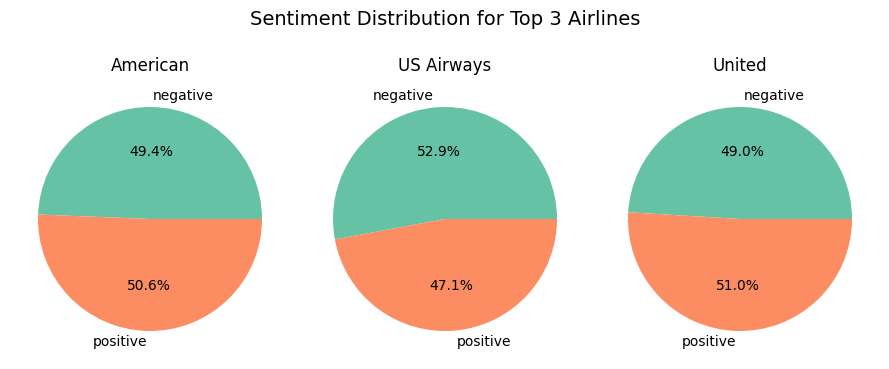

In [58]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn

lex_proportion = df_lexicon.groupby(['airline','sentiment_score'])['tweet_id'].count().reset_index(name="counts")
lex_proportion = lex_proportion[lex_proportion['sentiment_score'] != 'neutral']
airlines = lex_proportion['airline'].unique()

#visualise air sentiments by airlines
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
axes = axes.flatten()
colors = seaborn.color_palette('Set2')

# plot pie chart for each airline
for i, airline in enumerate(airlines):
    lex_data = lex_proportion[lex_proportion['airline'] == airline]
    lex_counts = lex_data['counts']
    lex_labels = lex_data['sentiment_score']
    ax = axes[i]
    ax.pie(lex_counts, labels=lex_labels, colors= colors, autopct='%1.1f%%')
    ax.set_title(airline, fontsize=12)

plt.suptitle("Sentiment Distribution for Top 3 Airlines", fontsize=14)
plt.tight_layout()
plt.show()

Among the three most popular airlines, American and United received more positive sentiments than negative sentiments.


---



<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling

Topic modelling helps to identify the commonly mentioned issues that customers feel negative about the airlines.

### Data Preparation



In [59]:
# Filter rows with negative airline sentiment
df_LDA = df[df['airline_sentiment'].isin(['negative'])].reset_index()

# Transform all text into lower case
# clean the data with pre-defined preprocess program to remove meaningless elements
df_LDA['text']=df_LDA['text'].str.lower()
df_LDA['text']=preprocess(df_LDA['text'])

df_LDA.head()

,index,tweet_id,airline_sentiment,airline,name,text,tweet_location
0,3,570301031407624196,negative,Virgin America,jnardino,"it's really aggressive to blast obnoxious ""en...",NaN
1,4,570300817074462722,negative,Virgin America,jnardino,and it's a really big bad thing about it,NaN
2,5,570300767074181121,negative,Virgin America,jnardino,seriously would pay $30 a flight for seats th...,NaN
3,15,570282469121007616,negative,Virgin America,smartwatermelon,sfo-pdx schedule is still mia.,"palo alto, ca"
4,17,570276917301137409,negative,Virgin America,heatherovieda,i flew from nyc to sfo last week and couldn'...,this place called NYC


In [62]:
#Further cleaning the data by selecting the alphabets and filter our short words
import re  #Regular expression operation package

tweet_text = df_LDA['text']
cleaned_text = []
for r in range(len(tweet_text)):
    review = tweet_text[r]
    try:
        # removing everything except alphabets
        review = re.sub('[^a-z]', ' ', review)
        # apply tokenization
        tokens = review.split()
        # removing short words
        filtered_token = [w for w in tokens if len(w)>3]
        review = ' '.join(filtered_token)
    except:
        continue
    #Save cleaned text
    cleaned_text.append(review)

Next, I use Part-of-Speech technique to extract the nouns and remove the stop-words from the text data to extract meaningful topic contents.

In [67]:
#Import libraries
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))
# add custom stop words
add_stop_word = ['dont','please','guys','thank','thanks','hours','tomorrow',
                 'today','someone','yesterday','week','delta','anything','something','nothing']
stop_words = stop_words.union(add_stop_word)

def extract_nouns(text):
    tagged = nltk.pos_tag(nltk.word_tokenize(text))
    nouns = [word for word, tag in tagged if tag in ['NN', 'NNS']]
    return ' '.join(nouns)

#for r in range(len(cleaned_text)):
for r in range(len(cleaned_text)):
    cleaned_text[r] = extract_nouns(cleaned_text[r])
    words = cleaned_text[r].split()
    cleaned_text[r] = ' '.join([word for word in words if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [68]:
# Apply stemming
from nltk.stem import PorterStemmer #Stemming Package

porter = PorterStemmer()
cleaned_text_stem = cleaned_text

for t in range(len(cleaned_text_stem)):
            cleaned_text_stem[t] = porter.stem(cleaned_text_stem[t])

In [69]:
#Produce a sparse representation of the counted tokens matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(cleaned_text_stem)
count_data

<9089x5540 sparse matrix of type '<class 'numpy.int64'>'
	with 34204 stored elements in Compressed Sparse Row format>

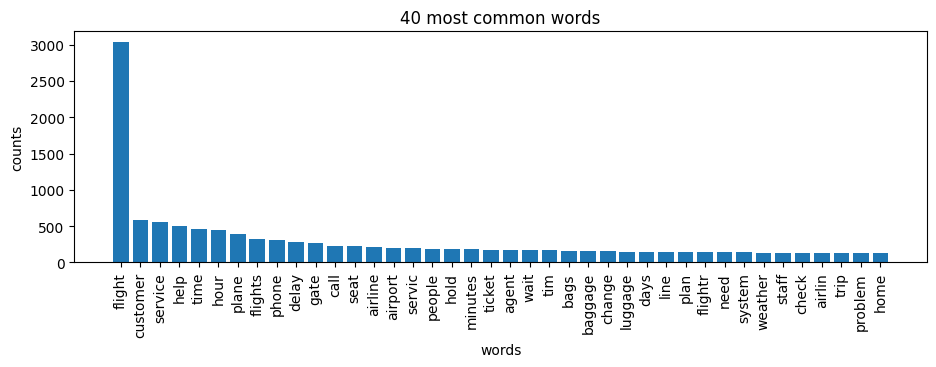

In [70]:
import numpy as np
import matplotlib.pyplot as plt

terms = count_vectorizer.get_feature_names_out()

# Count words popularity
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Select the top 40 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='40 most common words')
plt.bar(words, counts)
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

### Term Selection

I visualise the most comment 40 words in the cleaned text to explore the popular terms and then select meaningful words. analysis. The above plot shows the word "flight" has explicitly high frequency. I will filter out highly frequent words to facilitate topic discovery. Meanwhile, infrequrent words will be discarded, because they are not common and thus less representative.

In [71]:
#Remove highly frequent (Greater than ~20%) and infrequent words (less than 0.5%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1800 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex]
ReducedCount

Number of Terms Remained:  109


<9089x109 sparse matrix of type '<class 'numpy.int64'>'
	with 14035 stored elements in Compressed Sparse Row format>

After filtering the highly frequent and infrequent words, the remaining number of terms is 109.



---



# LDA Modelling


With the filtered 109 terms, I use Gensim LDA modelling to find out the best number of topics to find out the most concerned issues that customers are not happy with, and the key terms within each topic.

**Topic Numbers Experiment (Gensim LDA Model)**

I use Gensim LDA model to find out best topic numbers to optimise topic extraction.

In [72]:
!pip install Cython
!pip install gensim

Data Preparation

In [73]:
cleaned_text_new = []
for r in range(len(cleaned_text_stem)):
    each_item = []
    for t in cleaned_text_stem[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    cleaned_text_new.append(each_item)

In [74]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(cleaned_text_new)
print(id2word.token2id)

{'seats': 0, 'help': 1, 'times': 2, 'status': 3, 'fail': 4, 'food': 5, 'site': 6, 'problem': 7, 'trip': 8, 'seat': 9, 'call': 10, 'online': 11, 'phone': 12, 'service': 13, 'flights': 14, 'time': 15, 'book': 16, 'cal': 17, 'hour': 18, 'hold': 19, 'minutes': 20, 'tonight': 21, 'airline': 22, 'customer': 23, 'business': 24, 'experience': 25, 'wife': 26, 'check': 27, 'travel': 28, 'class': 29, 'passengers': 30, 'plane': 31, 'number': 32, 'anyone': 33, 'phon': 34, 'morning': 35, 'people': 36, 'hung': 37, 'line': 38, 'info': 39, 'response': 40, 'problems': 41, 'delay': 42, 'change': 43, 'need': 44, 'customers': 45, 'hotel': 46, 'ticket': 47, 'luggage': 48, 'weather': 49, 'luggag': 50, 'wait': 51, 'agent': 52, 'airport': 53, 'baggage': 54, 'airlines': 55, 'airlin': 56, 'money': 57, 'days': 58, 'email': 59, 'suck': 60, 'issu': 61, 'boston': 62, 'home': 63, 'rebook': 64, 'refund': 65, 'point': 66, 'departure': 67, 'reason': 68, 'crew': 69, 'claim': 70, 'minut': 71, 'night': 72, 'year': 73, 'boa

In [75]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in cleaned_text_new]
print(Corpus)


[[], [], [(0, 1)], [], [(1, 1)], [(0, 1), (2, 1)], [], [(3, 1)], [(4, 1), (5, 1), (6, 1)], [], [(7, 1), (8, 1)], [(1, 1), (9, 1)], [(10, 1), (11, 1), (12, 1), (13, 1)], [(6, 1)], [(1, 1), (14, 1), (15, 2)], [(16, 1)], [(1, 1), (14, 1)], [(17, 1), (18, 1)], [(14, 1), (19, 1), (20, 1), (21, 1)], [], [(22, 1)], [(13, 1), (23, 1)], [(13, 1), (23, 1)], [(22, 1)], [(14, 1)], [(24, 1), (25, 1)], [(1, 1), (26, 1)], [(6, 1)], [(14, 1)], [(18, 1), (24, 1), (27, 1), (28, 1)], [(15, 1), (25, 1)], [], [(29, 1), (30, 1), (31, 1)], [(12, 1), (32, 1)], [(33, 1), (34, 1)], [(27, 1), (35, 1)], [], [(24, 1), (27, 1), (36, 1)], [(13, 1), (37, 1), (38, 1)], [(6, 1), (27, 1), (39, 1)], [(31, 1)], [(40, 1)], [(6, 1), (7, 1), (41, 1)], [(13, 1), (23, 1), (42, 1)], [(1, 1), (12, 1), (15, 1), (43, 1), (44, 1)], [(27, 1), (45, 1)], [(22, 1), (46, 1)], [(46, 1)], [], [(12, 1), (13, 1), (18, 1), (29, 1), (44, 1), (47, 1)], [(0, 1), (14, 1), (16, 1)], [(48, 1)], [(3, 1), (15, 1), (49, 1)], [(27, 1)], [(9, 2), (16, 

Gensim LDA Model

In [76]:
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=2023)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.273*"hour" + 0.104*"minutes" + 0.086*"work" + 0.082*"home" + 0.065*"days" '
  '+ 0.061*"passengers" + 0.051*"fail" + 0.037*"delay" + 0.031*"board" + '
  '0.026*"delays"'),
 (1,
  '0.148*"servic" + 0.107*"hold" + 0.105*"bags" + 0.090*"customer" + '
  '0.087*"staff" + 0.066*"problem" + 0.064*"rebook" + 0.051*"money" + '
  '0.043*"person" + 0.037*"wife"'),
 (2,
  '0.199*"call" + 0.100*"delay" + 0.088*"ticket" + 0.071*"tim" + 0.071*"hotel" '
  '+ 0.069*"travel" + 0.059*"times" + 0.058*"reservation" + 0.042*"food" + '
  '0.033*"plane"'),
 (3,
  '0.209*"gate" + 0.110*"night" + 0.094*"check" + 0.091*"response" + '
  '0.088*"baggage" + 0.051*"agent" + 0.042*"year" + 0.038*"point" + '
  '0.038*"claim" + 0.037*"issu"'),
 (4,
  '0.151*"weather" + 0.126*"wait" + 0.105*"email" + 0.081*"airlin" + '
  '0.075*"morning" + 0.066*"credit" + 0.056*"mins" + 0.055*"pilot" + '
  '0.054*"airlines" + 0.040*"boston"'),
 (5,
  '0.201*"plane" + 0.106*"plan" + 0.093*"customers" + 0.072*"anyone" + '
  '0.

In [77]:
from gensim.models import CoherenceModel

# Calculate coherence score.
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=cleaned_text_new,
                                     dictionary=id2word,
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3321262800690489


I set 10 topics as the default to examine the coherence score. The result shows that when the topic number is 10, the coherence score is 0.332. Based on this result, I now will explore the best number of topics from 2 to 15.

In [78]:
#Evaluation models with topics numbers from 2 to 15
Topics = list(range(2,16,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=2023)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=cleaned_text_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))



Topic Number: 2 -- Coherence: 0.19645197489746835


Topic Number: 3 -- Coherence: 0.2490169583518381


Topic Number: 4 -- Coherence: 0.2916998190362078


Topic Number: 5 -- Coherence: 0.33021904227391746


Topic Number: 6 -- Coherence: 0.3616344094613493


Topic Number: 7 -- Coherence: 0.33153071410145724


Topic Number: 8 -- Coherence: 0.34584791365578726


Topic Number: 9 -- Coherence: 0.3393276332703319


Topic Number: 10 -- Coherence: 0.3321262800690489


Topic Number: 11 -- Coherence: 0.33241757768275887


Topic Number: 12 -- Coherence: 0.3222624704057776


Topic Number: 13 -- Coherence: 0.3225816408972122


Topic Number: 14 -- Coherence: 0.3067704810849771
Topic Number: 15 -- Coherence: 0.31548321338364754


Text(0, 0.5, 'Coherence')

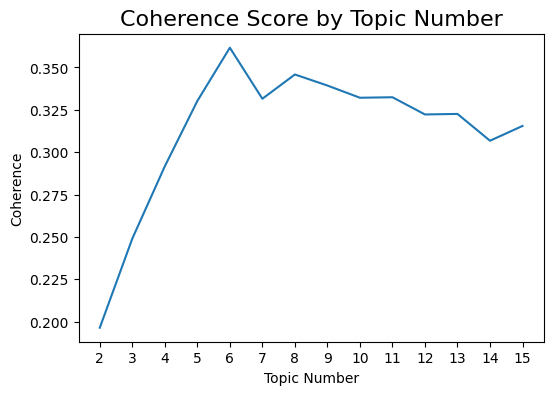

In [79]:
# visualise coherence scores
plt.figure(figsize=(6,4))
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

The best topics number is 6, with highest coherence score at 0.362.

**Topics Modelling (Optimal Topics Number = 6)**

I use LDA model to identify key terms based on the best number of topics obtained from Gensim LDA model.

In [80]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Best number of topics obtained from Gensim LDA model
number_topics_best = 6

lda_n = LDA(n_components=number_topics_best, n_jobs=-1, random_state=2023)
lda_n.fit(ReducedCount)


LatentDirichletAllocation(n_components=6, n_jobs=-1, random_state=2023)

In [81]:
#Top 10 words of the model with optimal topic numbers
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(0,
  '0.191*"hour" + 0.105*"flights" + 0.087*"delay" + 0.075*"minutes" + 0.054*"airline" + 0.047*"work" + 0.036*"airlin" + 0.036*"talk" + 0.034*"fail" + 0.033*"food"'),
 (1,
  '0.118*"time" + 0.105*"customer" + 0.092*"servic" + 0.066*"luggage" + 0.063*"bags" + 0.051*"staff" + 0.048*"trip" + 0.041*"problem" + 0.038*"rebook" + 0.036*"money"'),
 (2,
  '0.116*"call" + 0.075*"phone" + 0.062*"ticket" + 0.060*"change" + 0.057*"need" + 0.055*"system" + 0.054*"seat" + 0.042*"hotel" + 0.042*"people" + 0.042*"tim"'),
 (3,
  '0.154*"service" + 0.096*"customer" + 0.095*"gate" + 0.054*"line" + 0.046*"agents" + 0.043*"check" + 0.042*"response" + 0.039*"baggage" + 0.036*"night" + 0.035*"email"'),
 (4,
  '0.216*"help" + 0.069*"airport" + 0.062*"hold" + 0.047*"home" + 0.046*"days" + 0.043*"book" + 0.042*"times" + 0.038*"flightr" + 0.036*"cal" + 0.034*"wait"'),
 (5,
  '0.138*"plane" + 0.069*"plan" + 0.063*"weather" + 0.058*"customers" + 0.056*"agent" + 0.043*"seats" + 0.041*"anyone" + 0.038*"problems" 

In [82]:
Word_Topics_Pro_n = lda_n.components_ / lda_n.components_.sum(axis=1)[:, np.newaxis]

for topic_idx, topic in enumerate(Word_Topics_Pro_n):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
gate : 0.139
agent : 0.087
luggage : 0.075
days : 0.074
flightr : 0.072

Topic #1:
hour : 0.116
call : 0.081
seat : 0.079
airline : 0.076
ticket : 0.063

Topic #2:
help : 0.166
delay : 0.114
bags : 0.064
home : 0.052
hotel : 0.052

Topic #3:
flights : 0.132
phone : 0.085
airport : 0.084
servic : 0.081
minutes : 0.059

Topic #4:
time : 0.219
plan : 0.068
need : 0.067
airlin : 0.064
trip : 0.063

Topic #5:
service : 0.206
customer : 0.174
plane : 0.115
people : 0.071
tim : 0.057


In [83]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro_n)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

,agent,agents,airlin,airline,airlines,airport,anyone,bag,baggage,bags,...,times,tonight,travel,trip,wait,weather,wife,wifi,work,year
0,0.087197,0.019346,0.000085,0.000085,0.041108,0.000085,0.000085,0.000085,0.000085,0.000085,...,0.000085,0.000085,0.060861,0.000085,0.000085,0.069471,0.000085,0.000085,0.065419,0.000085
1,0.000059,0.000059,0.000059,0.075616,0.000059,0.000059,0.000059,0.020441,0.055584,0.000059,...,0.040598,0.000059,0.000059,0.000059,0.060504,0.000059,0.000059,0.000059,0.000059,0.000059
2,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.000067,0.064417,...,0.000146,0.007595,0.000067,0.000067,0.000067,0.000067,0.025647,0.000067,0.000067,0.022049
3,0.000070,0.000070,0.000070,0.000070,0.000070,0.084267,0.032584,0.000070,0.000070,0.000070,...,0.000070,0.000070,0.000070,0.000070,0.000070,0.000070,0.000070,0.000070,0.000070,0.000070
4,0.000080,0.034865,0.063640,0.000080,0.000080,0.000091,0.000080,0.000080,0.000080,0.000080,...,0.000293,0.000080,0.000080,0.063162,0.000080,0.000080,0.000080,0.000080,0.000080,0.000080
5,0.000062,0.000130,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,0.000062,...,0.000062,0.014318,0.000062,0.000062,0.000062,0.000062,0.000062,0.023223,0.000062,0.000062


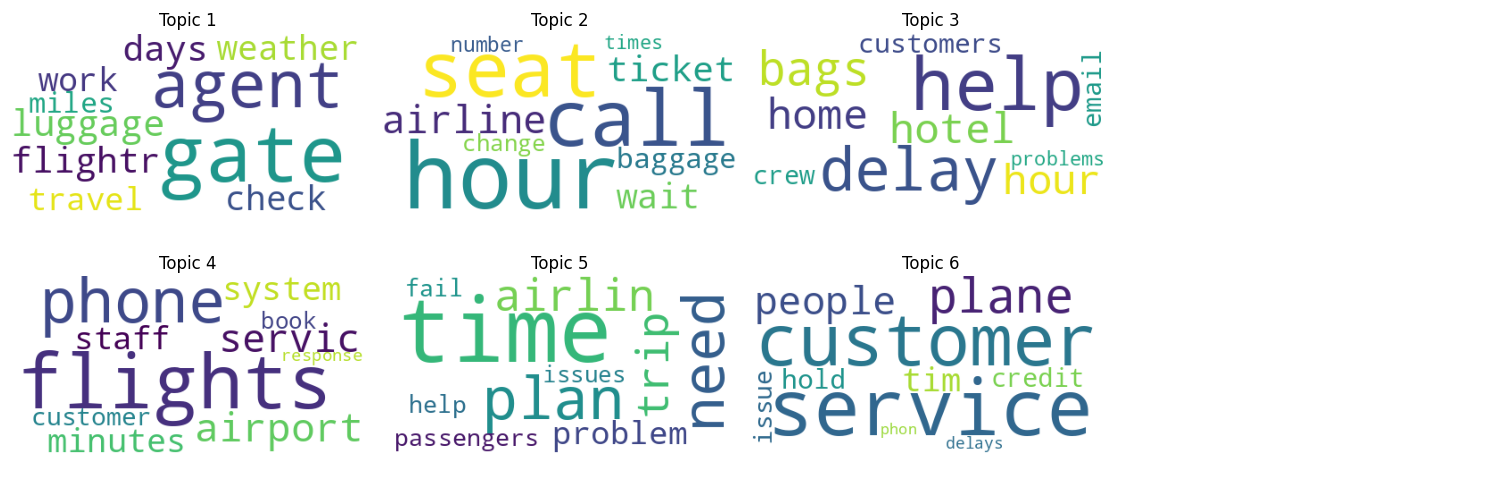

In [84]:
#Visualise by WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

rows = math.ceil(len(Word_Topics_Pro_n)/3)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]

for topic_idx, topic in enumerate(Word_Topics_Pro_n):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)

    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx//3)
    subfig_Col = math.ceil(topic_idx%3)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))

plt.tight_layout()
plt.show()

I visualise the topics with word clouds to interpret.

The summary of issues within each topic that customers are not happy with can be interpreted as below:


1.   Airline gate, luggage and agent problems
2.   Long phone response time about seat and baggage re-arrangement
3.   Help supports caused by delays
4.   Airport based services relating to flights, staff, hotline response time and system
5.   Airline timing problems interrupt their trip plan
6.   Customer service regarding delays and planes






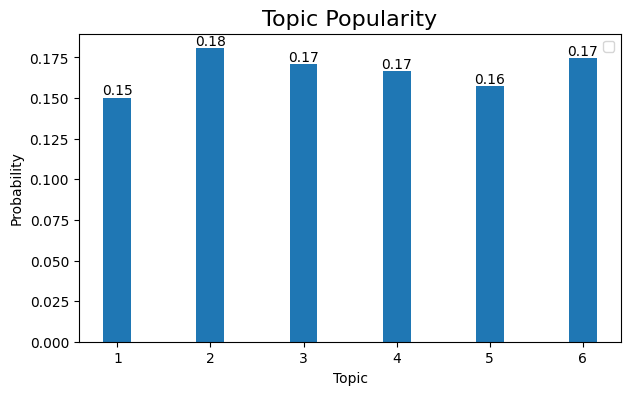

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns

#Calculate topic distribution for each tweet
TopicDis_tweet = lda_n.transform(ReducedCount)

#Calculate overall topic distribution for all each tweet
Overall_Topic_Dis = sum(TopicDis_tweet)/sum(sum(TopicDis_tweet))
# Get the topic index
Bar_index = np.asarray(range(1,number_topics_best+1))

#Visualize topic distributions of review groups
plt.figure(figsize=(7,4))
plt.title('Topic Popularity', fontsize=16)
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
plt.xticks(Bar_index, Bar_index)
plt.legend()
for i, prob in enumerate(Overall_Topic_Dis):
    plt.text(Bar_index[i], prob, f'{prob:.2f}', ha='center', va='bottom')

plt.show();

The plot shows the popularity of topics are fairly constant, with topic 2 slightly more common among them.

In [86]:
#Visualise topic distribution by airlines
import numpy as np

airlines = ['Virgin America','United','Southwest','Delta','US Airways','American']

Bar_index = np.asarray(range(1,number_topics_best+1))

Group_Prob = []
for i in range(len(airlines)):
    ReducedTerm_Selected = ReducedCount[np.where(df_LDA['airline'] == airlines[i])]
    TopicDis_tweet = lda_n.transform(ReducedTerm_Selected)
    Group_Prob.append(sum(TopicDis_tweet)/sum(sum(TopicDis_tweet)))

#Visualise with bar chart
plt.figure(figsize=(8,5))
plt.title('Topic Distributions by Airlines', fontsize=16)
plt.xlabel('Topic')
plt.ylabel('Probability')

width = 0.1
for i in range(len(airlines)):
    plt.bar(Bar_index + i * width, Group_Prob[i], width, label=airlines[i])

plt.xticks(Bar_index + 1.5*width, Bar_index)
plt.legend()
plt.ylim(0, 0.3)
plt.show();

The bar chart shows the probabilities of each topic in regard to each airline. Overall, it appears topic 5 involves common problems of all airlines. Virgin America seems to have problems mentioned in topic 1 and 2 more frequently than the others, but outpreform all others in dealing with issues in topic 6. The issues in topic 3 is most common to Delta. For US airways and Southwest, issues in topic 2 and 6 are most common, while for United, issues in topic 3 and 6 are most common.







<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

**Aim:** To apply analytics result in addressing practical business problems.

**Overview**

United is the most popular airlines appeared in the tweets, occupying 26% of the total number of tweets.
The geographical locations where most customers who are based in are different for each airlines. It appears customers based in TX are largest segments for American and Southwest, while Delta (Jetblue) and US Airways have most customers based in NY . They are almost equally mentiioned in the tweets. Hence, these airline pairs are considered to be direct competitors of each other. United and Virgin America have most customers based in CA, yet only 3.5% of the tweets mentioned Virgin America, which is significantly less than the United.

Regarding the airline sentiments, it shows the top 3 mostly mentioned airlines, which are United, American and US Airways,  recieved considerably higher proportion of negative sentiments. This phenomenon might imply that their customers tend to post comments on social media when they are dissatisfied with the airline's offerings. Therefore, for these 3 airlines, constant social analytics is an effective way to improving their customer dissatisfaction by understanding the source of dissatisfaction.

**Sentiment Analysis**

Refer to our sentiment analysis, the results show, by using machine learning approaches, in general, it is able to predict more than 70% customer's sentiment accurately about the airlines by analysing their tweet comments. In this connection, performing regular social analytics on tweets can help the airlines to predict customer's emotion about their company before it is too late to compensate, and take appropriate actions accordingly for airlines to retain existing customers and attract new customers.

For the top 3 mostly mentioned airlines, United, American and US Airways, their positive versus negative proportion based on the sentiment scores obtained by lexicon based analysis are almost equally distributed. Combining these findings with the greatly higher proportion of negative airline sentiments observed in Data Exploration (Section 2), it appears their customers tend to have negative sentiment towards airline even they do not post negative comments on social media. In this situation, airlines can compare custoomer feedbacks obtained by their other channels to see a better picture of their dissatisfacton. Also, they can increase their channels for collecting customer feedbacks, such as short survey and chatbots.

**Topics About Customer's Negative Sentiments**

Topic modelling helps airlines to uncover what the main concerns that customers are not happy with, so to effectively improve these issues.
Our key findings show the most common issue that lead to customer's negative sentiments are regarding dissatisfactory custoomer service, espcially long customer hotlines response time when customers need to change their plans, like seat and luggage re-arrangement due to delays. This is more frequently observed from United, Southwest and US Airways. Frankly, there are rooms for improvement in their customer services. Airlines can allocate more resources to tackle these issues by hiring more customer service representatives, reviewing and streamlining their procedures and automating some of the processeses to better support their customers.

In addition, the common issues of all airlines that lead to customer's negative sentiments are related to airline timing problems that interrupt their trip plan. Airlines can put more efforts to improve the first two issues by improving punctuality of their flights and review their policy on supporting customers to handle this situation, like providing discounted temporary accomodations, or offering alternative flights to corp with their plans.


### References:

IBM. (n.d.). What is social media analytics?. https://www.ibm.com/topics/social-media-analytics